## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset. 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [1]:
#Import libraries
#Import Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
#Load data
adult = pd.read_csv("Datasets/adult.csv")

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Quick EDA

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adult.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
#Drop Missing Values
adult = adult.dropna()

In [7]:
#Check for duplicates
adult.duplicated().sum()

np.int64(29)

In [8]:
#Drop Duplicates
adult = adult.drop_duplicates()

1. Clean the `income` variable such that it has only two values

In [9]:
#Transform the income column to contain only two values
adult["income"] = adult["income"].apply( lambda income: income.strip("."))
adult["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
#Encode income column to binary classification
#So 0 will be income <= 50k and 1 will be income >50k
adult["income"] = adult["income"].map({"<=50K": 0, ">50K":1})
adult["income"]

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 47592, dtype: int64

2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables

For our model we are going to select the features age, education, occupation, sex, houre-per-week.
Since some of them are categorical variables we will get dummy variables for those.

In [11]:
#Define the independent variables
X = adult[["age", "education","occupation", "sex", "hours-per-week"]]

#Define the dependent variables(target for prediction)
y = adult["income"]

Since KNN is distance based algorithms, we have to scale the data. If the data is not scaled, features with larger scales will dominate the distance calcculation.
Lets plot our data to decide on the scaler.

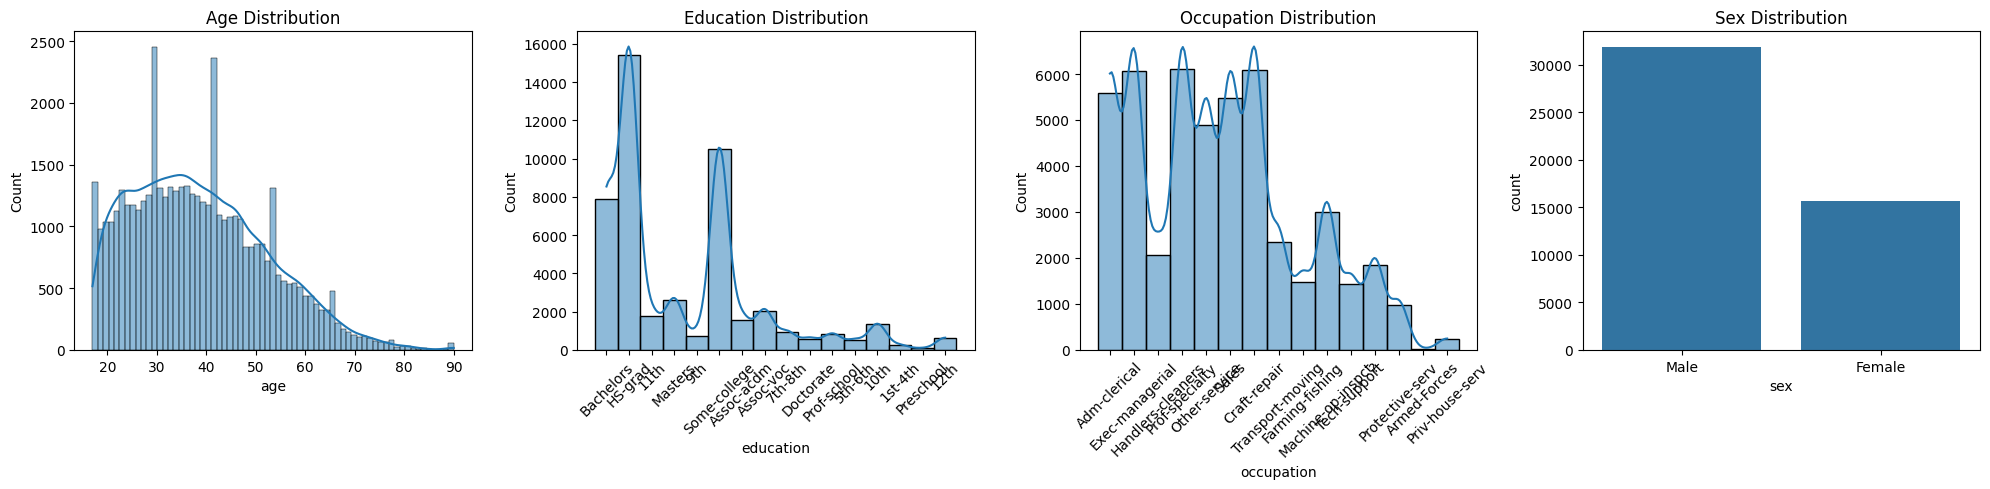

In [12]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Plot age (histogram)
sns.histplot(X['age'], ax=axes[0], kde=True)
axes[0].set_title('Age Distribution')

# Plot education (countplot)
sns.histplot(x='education', data=X, ax=axes[1],kde=True)
axes[1].set_title('Education Distribution')
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Plot occupation (countplot)
sns.histplot(x='occupation', data=X, ax=axes[2], kde=True)
axes[2].set_title('Occupation Distribution')
axes[2].tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Plot sex (countplot)
sns.countplot(x='sex', data=X, ax=axes[3])
axes[3].set_title('Sex Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Our data does not follow a normal distribution, hence we are going to use minmax scaler.

In [13]:
#Get dummy variables 
X = pd.get_dummies(X, columns=["education", "occupation","sex"], drop_first=True, dtype=int)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

We dont have to scale the y target since we already turned it into 0,1.

3. Split the datasets into training and testing set

In [15]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 

In [16]:
#Import Clisifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Empirically 1 < k < 10 yields a high classification accuracy in many cases, thats why we are testing the accuracy in that range. We are also including cross validation in order to choose the k with 5 folds.Cross validation provides a more robust estimate of our models's performance 

In [17]:
#Test the accuracy from 2 neighbours up to 10
from sklearn.model_selection import cross_val_score
accuracy_row_list = []
for k in range(2, 11):
    #Model Initializing
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)

    accuracy_row_list.append({"k":k, "CV Accuracy":scores.mean()})
    


Calcualting the accuracy on the training set helps us understand if our model is over or underfitting.

In [18]:
#Display the accuracy scores
acc_df = pd.DataFrame(accuracy_row_list)

#Print the accuracy score in descending order for Test Accuracy.
acc_df.sort_values("CV Accuracy", ascending=False)

,k,CV Accuracy
8,10,0.802931
6,8,0.801828
7,9,0.799832
4,6,0.798650
5,7,0.796575
2,4,0.793738
3,5,0.790402
0,2,0.780159
1,3,0.779870


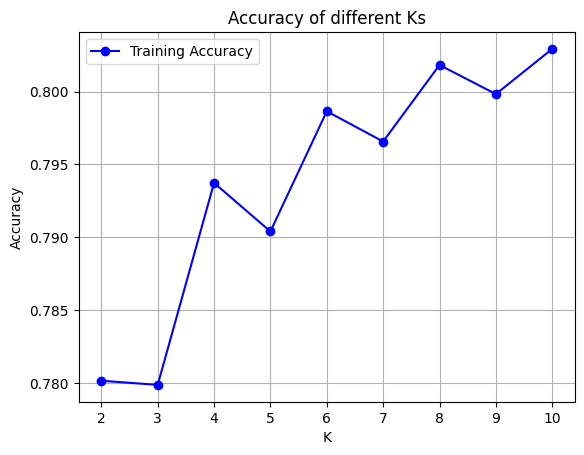

In [19]:
#Visualize the accuracies for different K
plt.plot(acc_df["k"], acc_df["CV Accuracy"], label = 'Training Accuracy', color='blue', marker='o', linestyle='solid')
   
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.grid()
plt.legend()

plt.show()

From the plot, as well as from the tables, we see that the best number of neighbors (k) is 10. 

In [20]:
#Import Libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [21]:
#Train a KNN model for k=10
#Model Initializing
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model
knn.fit(X_train, y_train)

#Predicting on train set and test set
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

#Get accuracy metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)


#Save the metrics into dataframe
accuracy_table = pd.DataFrame({
    'Model': ['KNN'],
    'Train Accuracy': [accuracy_train],
    'Test Accuracy': [accuracy_test],
    'Precision':[precision],
    'Recall':[recall],
    'F1-Score':[f1]

})

In [22]:
#Print the evalutaion metrics
accuracy_table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,KNN,0.830037,0.794516,0.63133,0.398721,0.488761


The training accuracy and testing accuracy are close to each other for k=10, meaning that our model is potentially overfitting and but overall generalizes new data well.
* Precision: When our model predicts a postive outcome, it correct 63% of the time.
* The recall shows that the model only captures about 39% of actual positive cases.
* F1 score provides a balanced view of precision and recall, indicating a moderate overall performance.

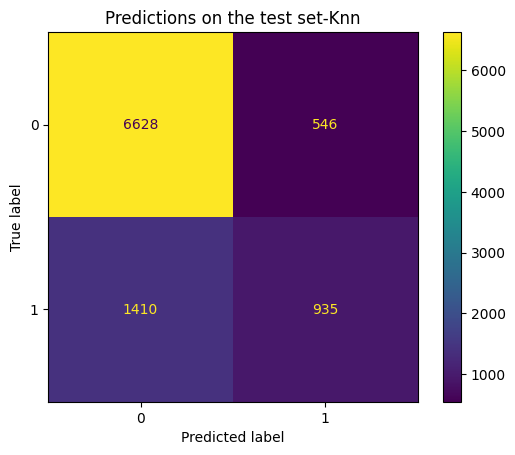

In [23]:
#Import libriaries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Plot the test predictions
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot()
plt.title("Predictions on the test set-Knn")
plt.show()

5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [24]:
#Add constant to the train set
X_train_lr = sm.add_constant(X_train).copy()

#Add constant to the test set
X_test_lr = sm.add_constant(X_test).copy()

Stats model requires the indexes to be perfectly alinged so we reset the indexes just to prevent errors

In [25]:
#Reset Index 
X_train_lr = X_train_lr.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [26]:
#Train the model
log_reg_model = sm.Logit(y_train, X_train_lr).fit()

Optimization terminated successfully.
         Current function value: 0.413648
         Iterations 9


In [27]:
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                38073
Model:                          Logit   Df Residuals:                    38040
Method:                           MLE   Df Model:                           32
Date:                Fri, 14 Mar 2025   Pseudo R-squ.:                  0.2517
Time:                        22:45:59   Log-Likelihood:                -15749.
converged:                       True   LL-Null:                       -21046.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.6405      0.180    -36.892      0.000      -6.993      -6.288
age                              3.2284      0.086     37.680      0.000       3.060       3.396
hours-per-week                   3.2541      0.125     26.056      0.000       3.009       3.499
education_11th                   0.0947      0.183      0.519      0.604      -0.263       0.453
education_12th                   0.3149      0.225      1.400      0.162      -0.126       0.756
education_1st-4th               -0.7275      0.418     -1.739      0.082      -1.547       0.093
education_5th-6th               -0.2562      0.272     -0.943      0.346      -0.789       0.276
education_7th-8th               -0.4035      0.207     -1.953      0.051      -0.808       0.001
education_9th                   -0.4120      0.243     -1.694      0.090      -0.889       0.065
education_Assoc-acdm             1.5138      0.151     10.021      0.000       1.218       1.810
education_Assoc-voc              1.5051      0.146     10.279      0.000       1.218       1.792
education_Bachelors              1.9570      0.137     14.252      0.000       1.688       2.226
education_Doctorate              2.7279      0.176     15.475      0.000       2.382       3.073
education_HS-grad                0.9302      0.135      6.897      0.000       0.666       1.195
education_Masters                2.2670      0.144     15.790      0.000       1.986       2.548
education_Preschool             -1.3137      1.032     -1.273      0.203      -3.336       0.709
education_Prof-school            2.8628      0.168     17.059      0.000       2.534       3.192
education_Some-college           1.2283      0.136      9.004      0.000       0.961       1.496
occupation_Adm-clerical          0.7310      0.111      6.573      0.000       0.513       0.949
occupation_Armed-Forces          0.9079      0.716      1.268      0.205      -0.496       2.311
occupation_Craft-repair          0.8591      0.108      7.983      0.000       0.648       1.070
occupation_Exec-managerial       1.5473      0.106     14.567      0.000       1.339       1.756
occupation_Farming-fishing      -0.3994      0.142     -2.814      0.005      -0.678      -0.121
occupation_Handlers-cleaners    -0.1101      0.145     -0.761      0.447      -0.394       0.173
occupation_Machine-op-inspct     0.4805      0.120      4.000      0.000       0.245       0.716
occupation_Other-service        -0.4295      0.131     -3.270      0.001      -0.687      -0.172
occupation_Priv-house-serv      -1.3303      0.644     -2.066      0.039      -2.592      -0.068
occupation_Prof-specialty        1.2420      0.108     11.532      0.000       1.031       1.453
occupation_Protective-serv       1.1437      0.131      8.761      0.000       0.888       1.400
occupation_Sales                 1.0078      0.108      9.315      0.000       0.796       1.220
occupation_Tech-support          1.2006 

From the summary tables we can see that the p values for education_Doctorate, eudcation_Prof-school, occupation_Armed-Forces is larger than 0.05, which means that we might drop them since they are not statistically significant.

In [28]:
#Get Predictions
y_pred_train_lr = log_reg_model.predict(X_train_lr)
y_pred_test_lr = log_reg_model.predict(X_test_lr)

The logistic regression function returns a probability of belonging to each class. So we have to transform the probability into a class label.
It is natural to assign the class represented by 1 whenever the probability is greater than 0.5.

In [29]:
#Turn probabilities into class lables.
y_pred_train_lr_binary = (y_pred_train_lr > 0.5).astype(int)
y_pred_test_lr_binary = (y_pred_test_lr > 0.5).astype(int)

In [30]:
#Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train_lr_binary)
accuracy_test = accuracy_score(y_test, y_pred_test_lr_binary)
precision = precision_score(y_test, y_pred_test_lr_binary)
recall = recall_score(y_test, y_pred_test_lr_binary)
f1 = f1_score(y_test, y_pred_test_lr_binary)

#Add the scores in the accuracy_table
accuracy_table = pd.concat([accuracy_table, pd.DataFrame({"Model":"Logistic Regression",
                                        "Train Accuracy":[accuracy_train],
                                        "Test Accuracy":[accuracy_test],
                                        'Precision':[precision],
                                        'Recall':[recall],
                                        'F1-Score':[f1]})], axis=0)

accuracy_table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,KNN,0.830037,0.794516,0.631330,0.398721,0.488761
0,Logistic Regression,0.807160,0.806072,0.669153,0.420896,0.516754


Both models achieves accuracy around 80%. Though the KNN model might be more prone to overfitting, since there is larger difference on the training accuracy and the Test accuracy. The logistic regression on the other side, not only achieves higher test accuracy than the KNN, but also the difference between the training and testing accuracy is smaller, meaning that logistic regresion for this case show better generalization for unseen data and makes more accurate predictions.
The rest of the metric are also higher for logistic regression.

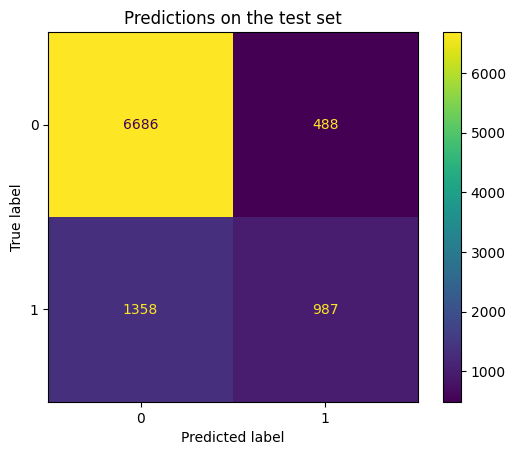

In [31]:
#Plot the train predictions
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test_lr_binary)).plot()
plt.title("Predictions on the test set")
plt.show()

6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [32]:
#Import Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
#Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [34]:
#Train the model 
dtree = dtree.fit(X_train, y_train)

#Make predictions
y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_test)

Let's make a confusion matrix to see the predictions.

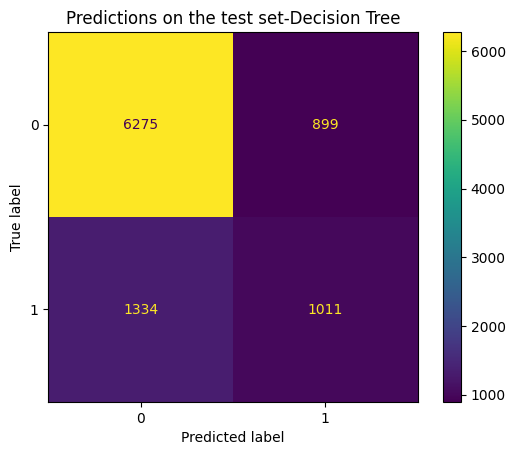

In [35]:
#Plot the test predictions
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_dt)).plot()
plt.title("Predictions on the test set-Decision Tree")
plt.show()

In [36]:
#Evaluation Scores
accuracy_train = accuracy_score(y_train, y_pred_train_dt)
accuracy_test = accuracy_score(y_test, y_pred_test_dt)
precision = precision_score(y_test, y_pred_test_dt)
recall = recall_score(y_test, y_pred_test_dt)
f1 = f1_score(y_test, y_pred_test_dt)

#Add the scores in the accuracy_table
accuracy_table= pd.concat([accuracy_table, pd.DataFrame({"Model":"Decision Tree",
                                        "Train Accuracy":[accuracy_train],
                                        "Test Accuracy":[accuracy_test],
                                        'Precision':[precision],
                                        'Recall':[recall],
                                        'F1-Score':[f1]})], axis=0)
accuracy_table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,KNN,0.830037,0.794516,0.631330,0.398721,0.488761
0,Logistic Regression,0.807160,0.806072,0.669153,0.420896,0.516754
0,Decision Tree,0.906338,0.765417,0.529319,0.431130,0.475206


It is noticable that the Decisoin tree models stands out with the highest F1-score. Meaning that it balances precision and recall. It also indicates that decision tree has a better balance between correctly identifying positive case and minimizing false positive/negatives.
Though the difference between the training accuracy and test accuracy indicates that the model is overffing more than the other two models.
Finally, the highest recall value, means that it is the best model at finding the positive cases.
Depending on the nature of the problem and what predictions we want to make indicates which from the 3 models we should choose. For example deveoping a prediction model for a rare disease, where the data present class imbalance in the positive cases, missing a diagnosis (false negative) could have severe consequences.

7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [37]:
#Import Library
from sklearn.ensemble import RandomForestClassifier

In [38]:
#Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#Predict 
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

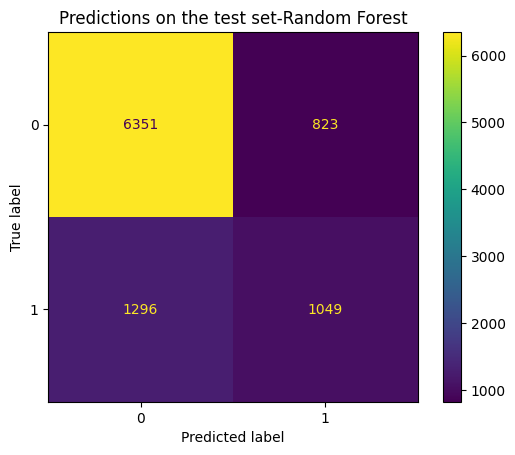

In [39]:
#Plot the test predictions
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_rf)).plot()
plt.title("Predictions on the test set-Random Forest")
plt.show()

In [40]:
#Evaluation Scores
accuracy_train = accuracy_score(y_train, y_pred_train_rf)
accuracy_test = accuracy_score(y_test, y_pred_test_rf)
precision = precision_score(y_test, y_pred_test_rf)
recall = recall_score(y_test, y_pred_test_rf)
f1 = f1_score(y_test, y_pred_test_rf)

#Add the scores in the accuracy_table
accuracy_table= pd.concat([accuracy_table, pd.DataFrame({"Model":"Random Forest",
                                        "Train Accuracy":[accuracy_train],
                                        "Test Accuracy":[accuracy_test],
                                        'Precision':[precision],
                                        'Recall':[recall],
                                        'F1-Score':[f1]})], axis=0)
accuracy_table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,KNN,0.830037,0.794516,0.631330,0.398721,0.488761
0,Logistic Regression,0.807160,0.806072,0.669153,0.420896,0.516754
0,Decision Tree,0.906338,0.765417,0.529319,0.431130,0.475206
0,Random Forest,0.906338,0.777393,0.560363,0.447335,0.497510


The Random forest model is showing the best overall performance, considering the F1-score, but also showing a considerable amount of overfitting.

8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [41]:
#Import Libraries
from sklearn.ensemble import AdaBoostClassifier

In [42]:
#Train the model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

#Get Predictions
y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

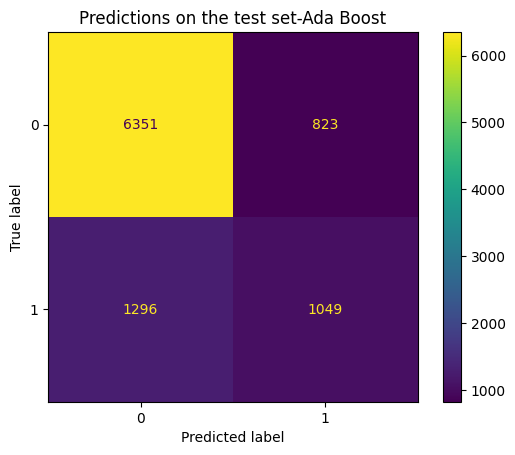

In [43]:
#Plot the test predictions
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_rf)).plot()
plt.title("Predictions on the test set-Ada Boost")
plt.show()

In [44]:
#Evaluation Scores
accuracy_train = accuracy_score(y_train, y_pred_train_ab)
accuracy_test = accuracy_score(y_test, y_pred_test_ab)
precision = precision_score(y_test, y_pred_test_ab)
recall = recall_score(y_test, y_pred_test_ab)
f1 = f1_score(y_test, y_pred_test_ab)

#Add the scores in the accuracy_table
accuracy_table= pd.concat([accuracy_table, pd.DataFrame({"Model":"Ada Boost",
                                        "Train Accuracy":[accuracy_train],
                                        "Test Accuracy":[accuracy_test],
                                        'Precision':[precision],
                                        'Recall':[recall],
                                        'F1-Score':[f1]})], axis=0)
accuracy_table

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,KNN,0.830037,0.794516,0.631330,0.398721,0.488761
0,Logistic Regression,0.807160,0.806072,0.669153,0.420896,0.516754
0,Decision Tree,0.906338,0.765417,0.529319,0.431130,0.475206
0,Random Forest,0.906338,0.777393,0.560363,0.447335,0.497510
0,Ada Boost,0.805873,0.801870,0.679157,0.371002,0.479868


The Adaboost model achieves a good balance between training and test accuracy, indicating minimal overfitting. It has the highest precision among all models, meaning it is minimizing false postives. The overall score score though (f1-score) is lower compared to the other. Bottom line, it is good choice when we have to minimize false positives.

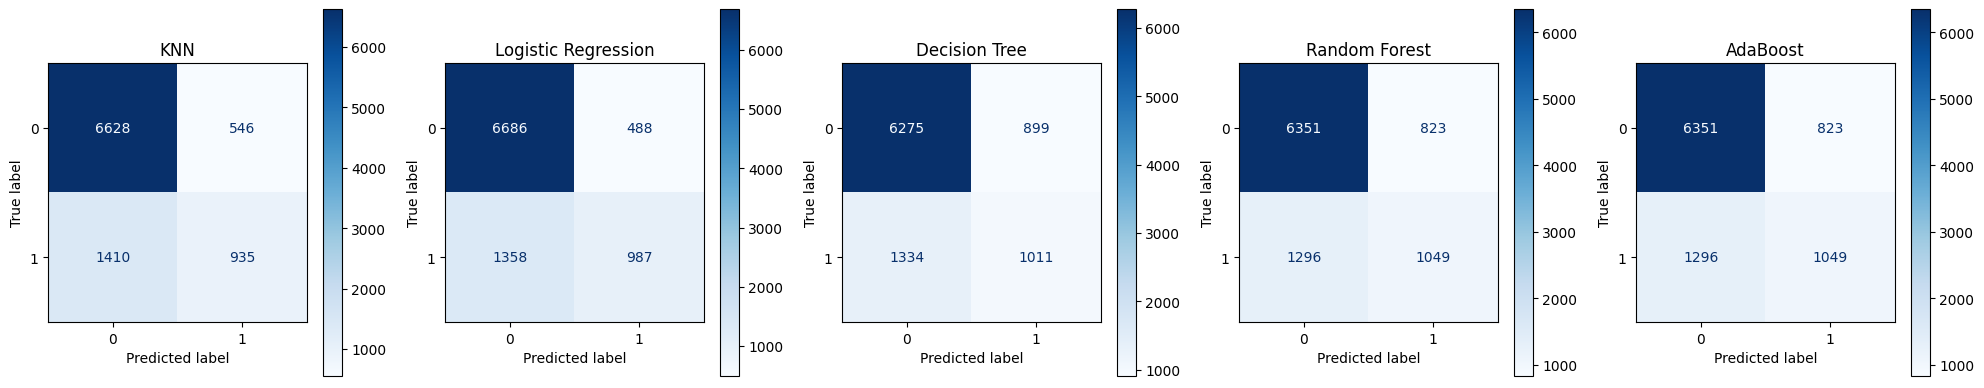

In [45]:
#Display all confusion matrices in one plot
# Define the models and their predictions
models = {
    "KNN": y_pred_test,
    "Logistic Regression": y_pred_test_lr_binary,
    "Decision Tree": y_pred_test_dt,
    "Random Forest": y_pred_test_rf,
    "AdaBoost": y_pred_test_rf
}

# Create a subplot with appropriate size
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop through models and plot confusion matrices
for ax, (title, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues", values_format="d")
    ax.set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

We could also check for the feature importance for the tree models to check how important the feature is for the model.

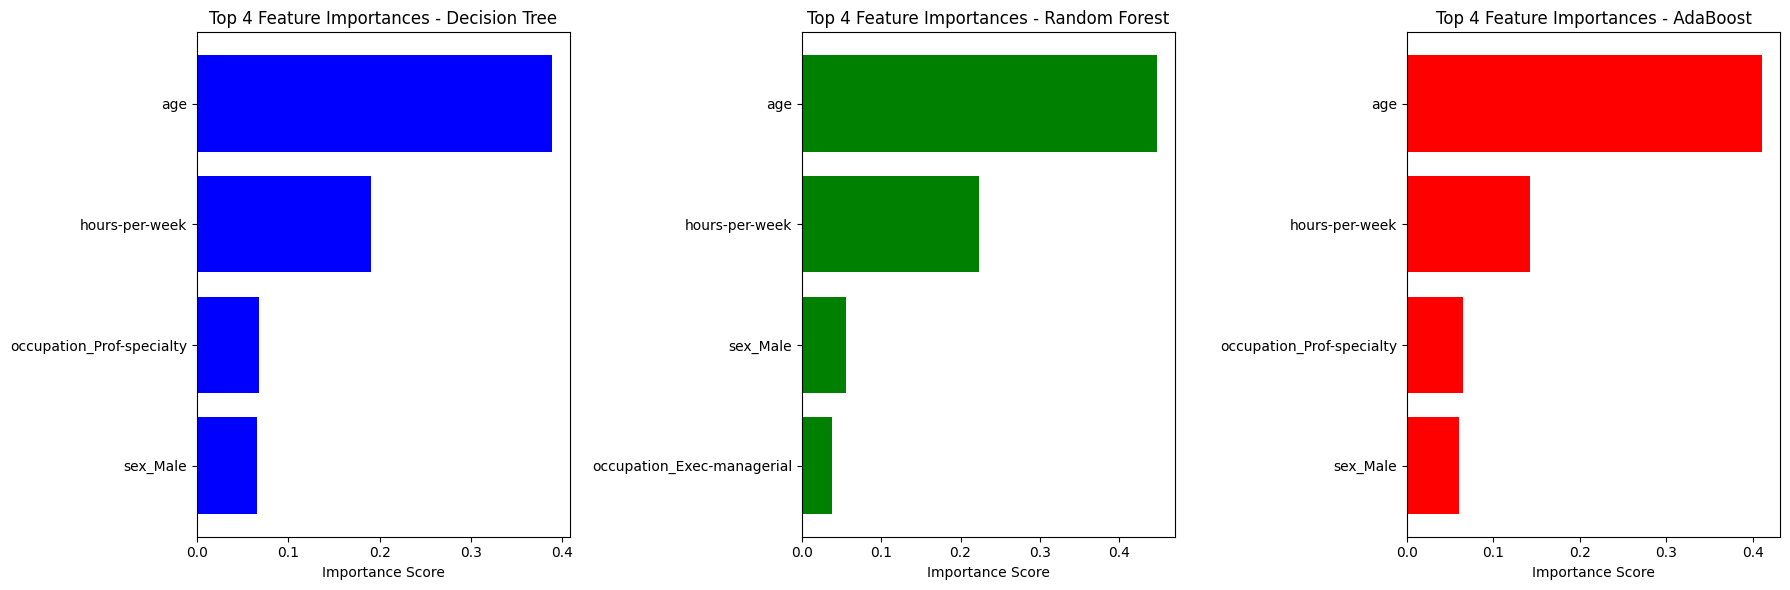

In [ ]:

# Collecting feature importances for each model
dt_importances = pd.Series(dtree.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(4)
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(4)
ada_importances = pd.Series(ab_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(4)

# Creating subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot Decision Tree feature importances (Top 4)
axes[0].barh(dt_importances.index[::-1], dt_importances.values[::-1], color="blue")
axes[0].set_title("Top 4 Feature Importances - Decision Tree")
axes[0].set_xlabel("Importance Score")

# Plot Random Forest feature importances (Top 4)
axes[1].barh(rf_importances.index[::-1], rf_importances.values[::-1], color="green")
axes[1].set_title("Top 4 Feature Importances - Random Forest")
axes[1].set_xlabel("Importance Score")

# Plot AdaBoost feature importances (Top 4)
axes[2].barh(ada_importances.index[::-1], ada_importances.values[::-1], color="red")
axes[2].set_title("Top 4 Feature Importances - AdaBoost")
axes[2].set_xlabel("Importance Score")


# Adjust layout for better spacing
plt.tight_layout()
plt.show()